<a href="https://colab.research.google.com/github/subhajitbn/TDA-Lab/blob/main/TDA_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topological data analysis: Lab 2

In [2]:
# The following line of code needs to run only once
!pip install scikit-tda

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 834.5/834.5 kB 23.2 MB/s eta 0:00:00
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18103 sha256=7629ba2d813ad4ef4c97b20c83713a355119b833afa23c1b41a42ee01dd039a9
  Stored in directory: /root/.cache/pip/wheels/ef/0f/3b/0f931844eecc34addd90e72d54cd39c08b7066c5f25c00b9a4
Successfully built hopcroftkarp


## 1. Import the necessary libraries

In [11]:
# Gives the np.array structure
import numpy as np

import random

from sklearn.pipeline import Pipeline

# Visualization libraries
from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

# Voronoi diagram, Delaunay triangulation, and euclidean distance
from scipy.spatial import distance
from scipy.stats import ks_2samp

# scikit-tda libraries
from ripser import ripser
import tadasets
from persim import plot_diagrams, PersLandscapeExact, PersistenceImager
from persim.landscapes import (
    PersLandscapeApprox,
    average_approx,
    snap_pl,
    plot_landscape,
    plot_landscape_simple
)

# The following line of code is for playing video files in PC
# from IPython.display import Video

# Only for Google colab notebook, to play video file
from IPython.display import HTML
from base64 import b64encode

## 2. Get a set of uniformly distributed points on the annulus

In [4]:
def annulus(number_of_pts: int,
            inner_radius: int,
            outer_radius: int):

    theta = 2*np.pi*np.random.uniform(size=number_of_pts)
    radius = np.random.uniform(inner_radius, outer_radius, number_of_pts)

    x = radius*np.sin(theta)
    y = radius*np.cos(theta)

    return np.column_stack((x,y))

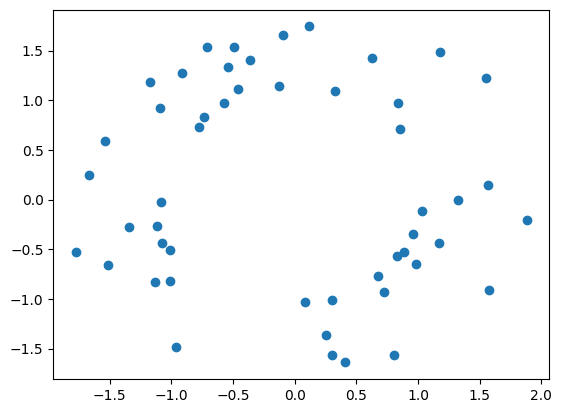

In [16]:
annulus_points = annulus(50,1,2)
plt.scatter(annulus_points[:, 0],annulus_points[:, 1]);

## 3. Points on a torus

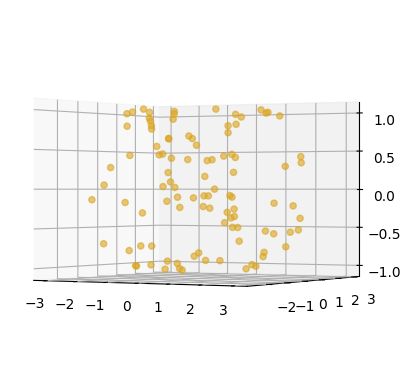

In [6]:
# 500 points of torus shape. See what happens if you take a smaller number of points.
torus_points = tadasets.torus(100, noise=None)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(torus_points[:, 0], torus_points[:, 1], torus_points[:, 2], c="goldenrod", alpha=0.6);

def rotate_torus(angle):
    ax.view_init(elev=angle)

rot_animation_torus = animation.FuncAnimation(fig, rotate_torus, frames=np.arange(0,92,2), interval = 1000)
rot_animation_torus.save('rot_torus_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In [7]:
# Uncomment the following code if on your PC.
# Video("rot_torus_animation.mp4")

# The following code is for encoding and playing video on Google colab.
mp4 = open('rot_torus_animation.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

## 4. Persistence diagram of the annulus and torus points

In [8]:
def diagram_sizes(dgms):
    return ", ".join([f"|$H_{i}$|={len(d)}" for i, d in enumerate(dgms)])

In [17]:
# PH0, PH1 and PH2 of the annulus_points
annulus_data = ripser(annulus_points, maxdim=2)['dgms']

# PH0, PH1 and PH2 of the torus_points
torus_data = ripser(torus_points, maxdim=2)['dgms']

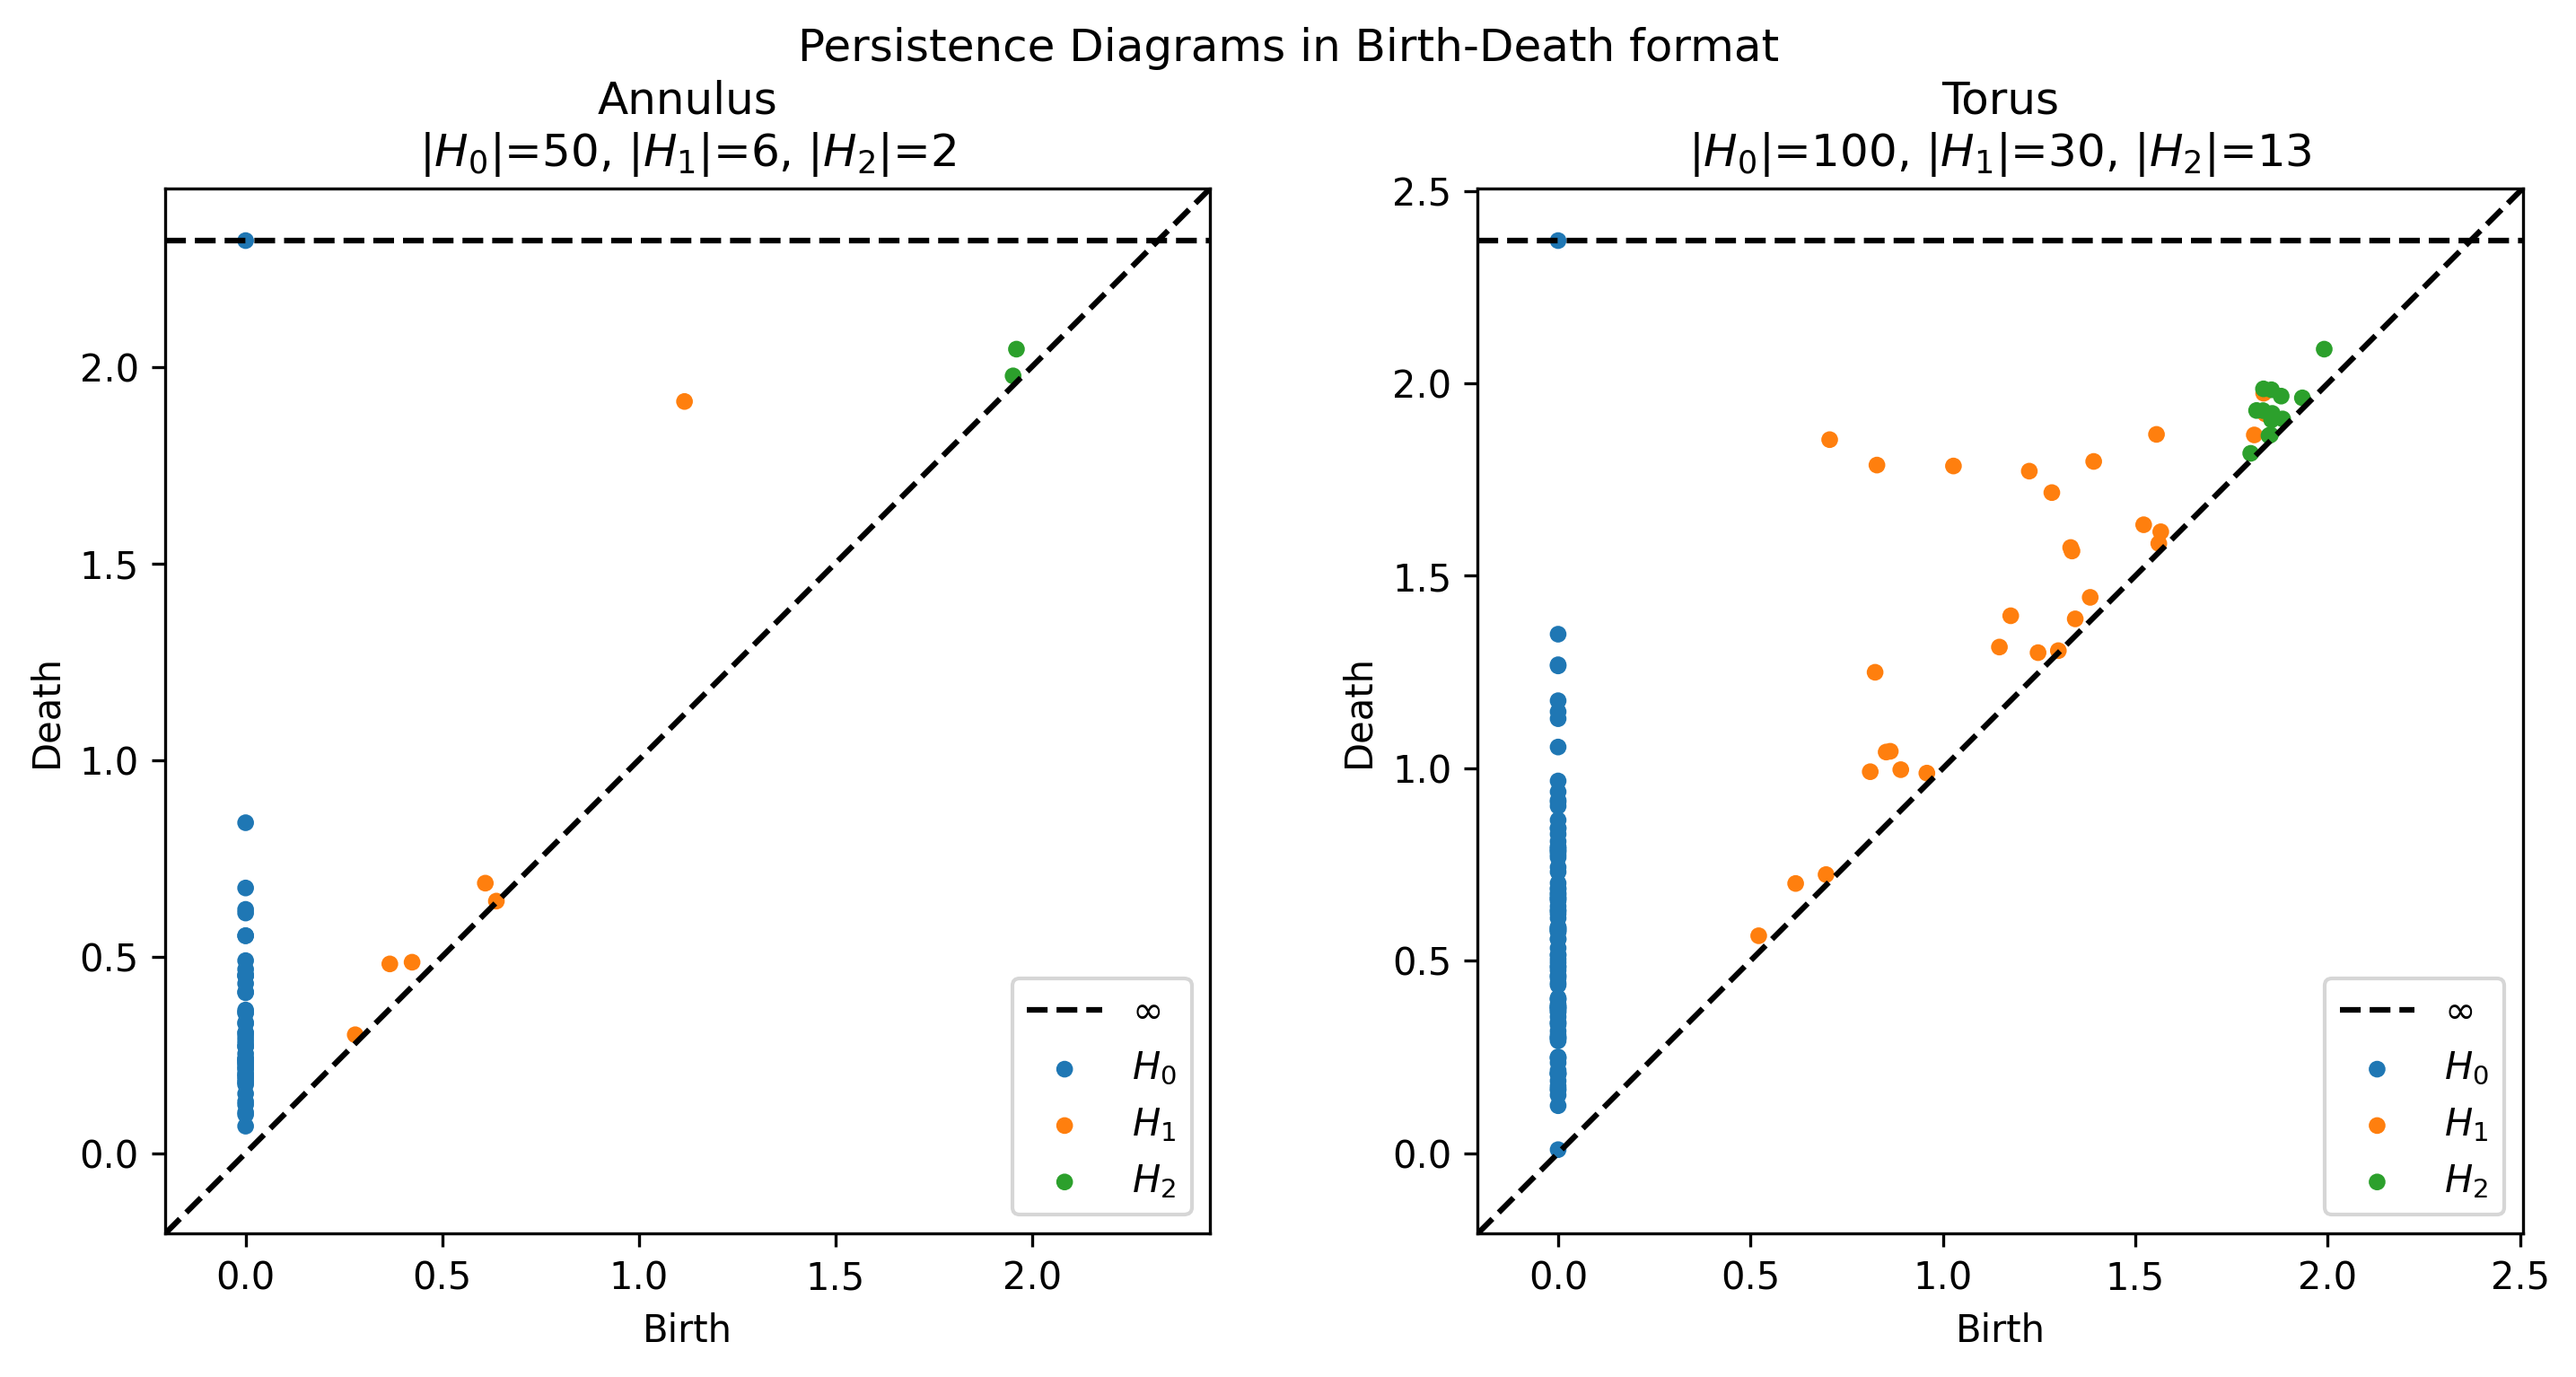

In [18]:
fig, axs = plt.subplots(1, 2, dpi=300)
fig.set_size_inches(10, 5)

# Plot the Birth-Death PD of annulus_data
plot_diagrams(
    annulus_data,
    title=f"Annulus\n{diagram_sizes(annulus_data)}",
    ax = axs[0],
)

# Plot the Birth-Death PD of torus_data
plot_diagrams(
    torus_data,
    title=f"Torus\n{diagram_sizes(torus_data)}",
    ax = axs[1]
)

fig.suptitle("Persistence Diagrams in Birth-Death format")
fig.tight_layout()

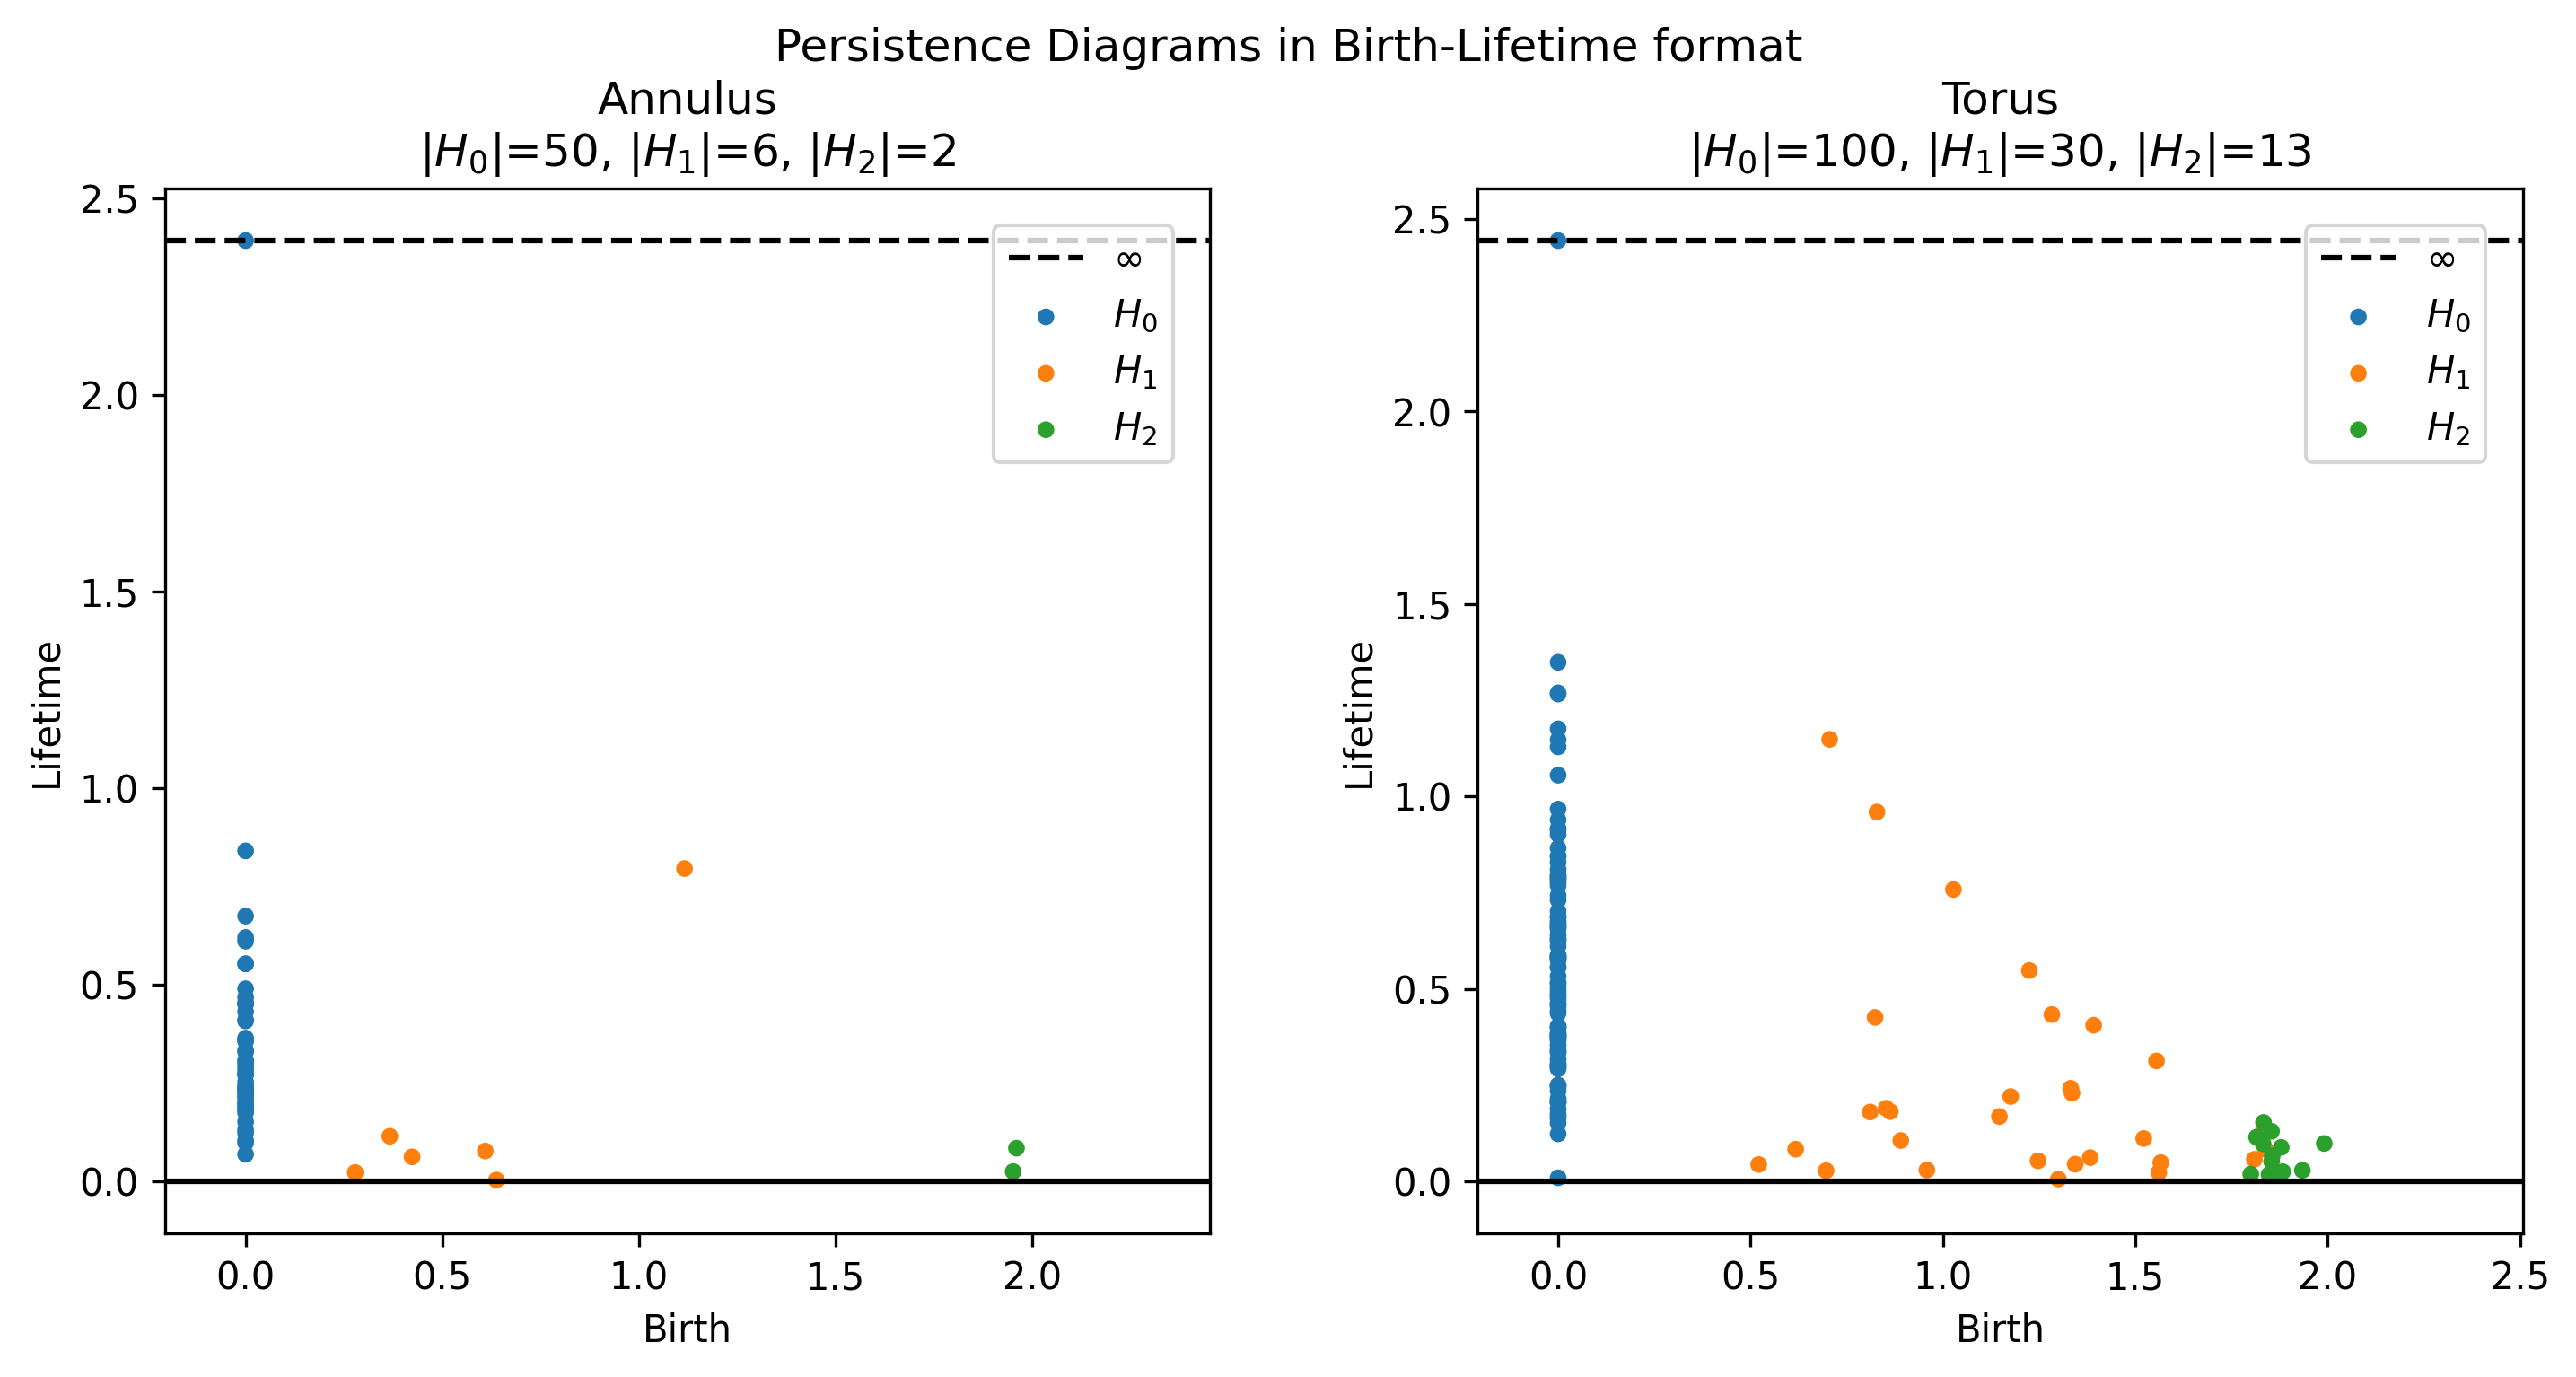

In [19]:
fig, axs = plt.subplots(1, 2, dpi=300)
fig.set_size_inches(10, 5)

# Plot the Birth-Lifetime PD of annulus_data
plot_diagrams(
    annulus_data,
    lifetime=True,
    title=f"Annulus\n{diagram_sizes(annulus_data)}",
    ax = axs[0],
)
# Set legend box at the top right corner
axs[0].legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=1)

# Plot the Birth-Lifetime PD of torus_data
plot_diagrams(
    torus_data,
    lifetime=True,
    title=f"Torus\n{diagram_sizes(torus_data)}",
    ax = axs[1]
)
# Set legend box at the top right corner
axs[1].legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=1)

fig.suptitle("Persistence Diagrams in Birth-Lifetime format")
fig.tight_layout()

## 5. Persistence landscapes of the annulus and torus data

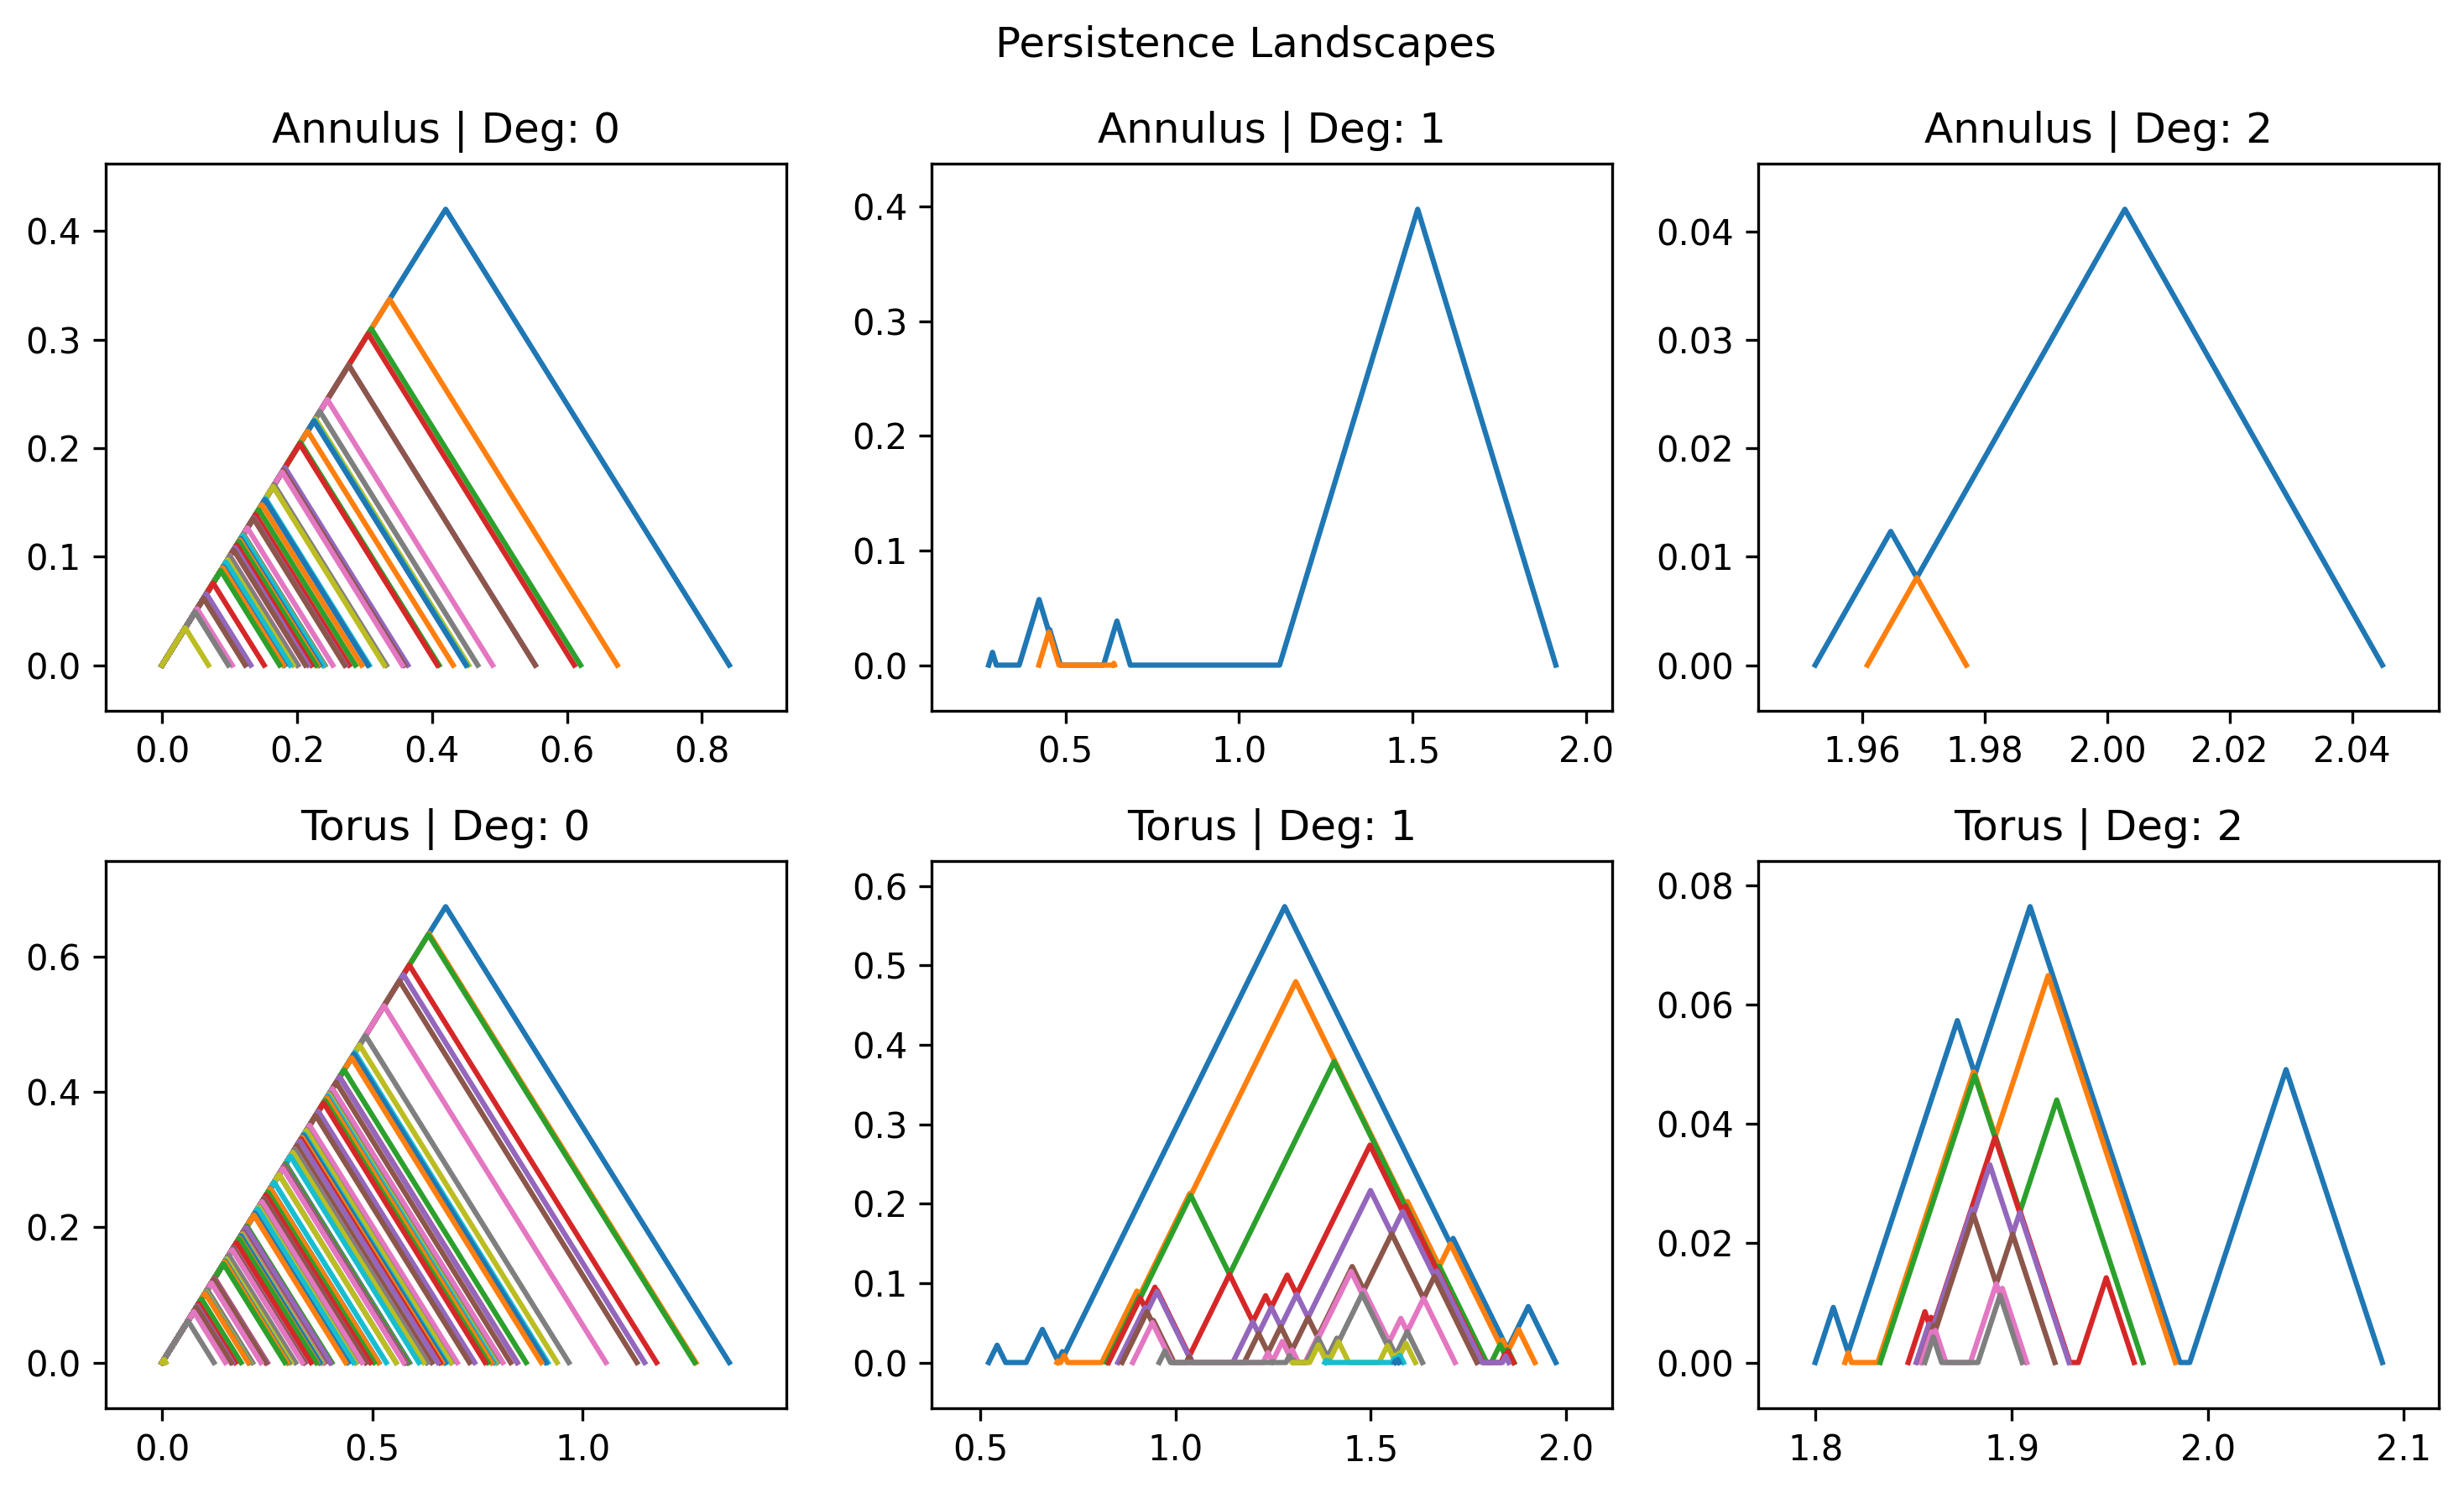

In [20]:
# Plot persistence landscapes
fig, axs = plt.subplots(2, 3, dpi=300)
fig.set_size_inches(10, 6)

for i in range(3):
    plot_landscape_simple(PersLandscapeExact(annulus_data, hom_deg=i),
                             title="Annulus | Deg: "+str(i), ax=axs[0,i])
    axs[0,i].legend('', frameon=False)
    plot_landscape_simple(PersLandscapeExact(torus_data, hom_deg=i),
                            title="Torus | Deg: "+str(i), ax=axs[1,i])
    axs[1,i].legend('', frameon=False)

plt.suptitle("Persistence Landscapes")
fig.tight_layout()

## 6. Statistical analyses on persistence landscapes of circle, annulus, and torus points

We take points sampled from a circle, an annulus and a torus. Persistence landscapes are used for averaging, difference and permutation tests.

In [21]:
circle_points = tadasets.dsphere(n=200, d=1)

CIRCLE_AVG_DISTANCE = np.mean(distance.pdist(circle_points)) # 1.2761018416753989
ANNULUS_AVG_DIST = np.mean(distance.pdist(annulus_points)) # 1.8366216036598966
TORUS_AVG_DIST = np.mean(distance.pdist(torus_points)) # 2.8718879600701332

CIRCLE_AVG_DISTANCE, ANNULUS_AVG_DIST, TORUS_AVG_DIST

(1.2691449461983761, 1.8460715845226485, 2.8137501479947473)

In [22]:
CIRCLE_AVG_DISTANCE = 1.276
ANNULUS_AVG_DIST = 1.837
TORUS_AVG_DIST = 2.872

# Scaling circle, annulus, and torus points so that in each dataset the average distance between points is roughly 1
circle_points = tadasets.dsphere(n=200, d=1)/CIRCLE_AVG_DISTANCE
annulus_points = annulus(50,1,2) / ANNULUS_AVG_DIST
torus_points = tadasets.torus(100) /TORUS_AVG_DIST

# These three results vary due to randomness. But each of these should be close to 1
np.mean(distance.pdist(circle_points)), np.mean(distance.pdist(annulus_points)), np.mean(distance.pdist(torus_points))

(0.9958075173674421, 1.0759819435694435, 0.9939444530600704)

In [23]:
circle_pls = []
annulus_pls = []
torus_pls = []

NUM_RUNS = 10

CIRCLE_AVG_DISTANCE = 1.276
ANNULUS_AVG_DISTANCE = 1.837
TORUS_AVG_DISTANCE = 2.872

for _ in range(NUM_RUNS):
  # Scaling circle points
  circle_points = tadasets.dsphere(n=200, d=1)/CIRCLE_AVG_DISTANCE
  # Compute PH0, PH1, and PH2 for circle
  circle_dgm = ripser(circle_points, maxdim=2)['dgms']
  # Compute persistence landscape of circle points for homology degree 1
  circle_pl = PersLandscapeApprox(dgms=circle_dgm, hom_deg=1)
  circle_pls.append(circle_pl)

  # Scaling annulus points
  annulus_points = annulus(50,1,2) / ANNULUS_AVG_DISTANCE
  # Compute PH0, PH1, and PH2 for annulus_points
  annulus_dgm = ripser(annulus_points, maxdim=2)['dgms']
  # Compute persistence landscape of annulus points for homology degree 1
  annulus_pl = PersLandscapeApprox(dgms=annulus_dgm, hom_deg=1)
  annulus_pls.append(annulus_pl)

  # Scaling torus points
  torus_points = tadasets.torus(100) /TORUS_AVG_DISTANCE
  # Compute PH0, PH1, and PH2 for torus_points
  torus_dgm = ripser(torus_points, maxdim=2)['dgms']
  # Compute persistence landscape of torus points for homology degree 1
  torus_pl = PersLandscapeApprox(dgms=torus_dgm, hom_deg=1)
  torus_pls.append(torus_pl)

In [24]:
circle_pls_average = average_approx(circle_pls)
annulus_pls_average = average_approx(annulus_pls)
torus_pls_average = average_approx(torus_pls)

circle_pls_average, annulus_pls_average, torus_pls_average

(Approximate persistence landscape in homological degree 1 on grid from 0.10428161174058914 to 1.3587137460708618 with 500 steps,
 Approximate persistence landscape in homological degree 1 on grid from 0.1131855770945549 to 1.1507680416107178 with 500 steps,
 Approximate persistence landscape in homological degree 1 on grid from 0.07758022099733353 to 0.6869746446609497 with 500 steps)

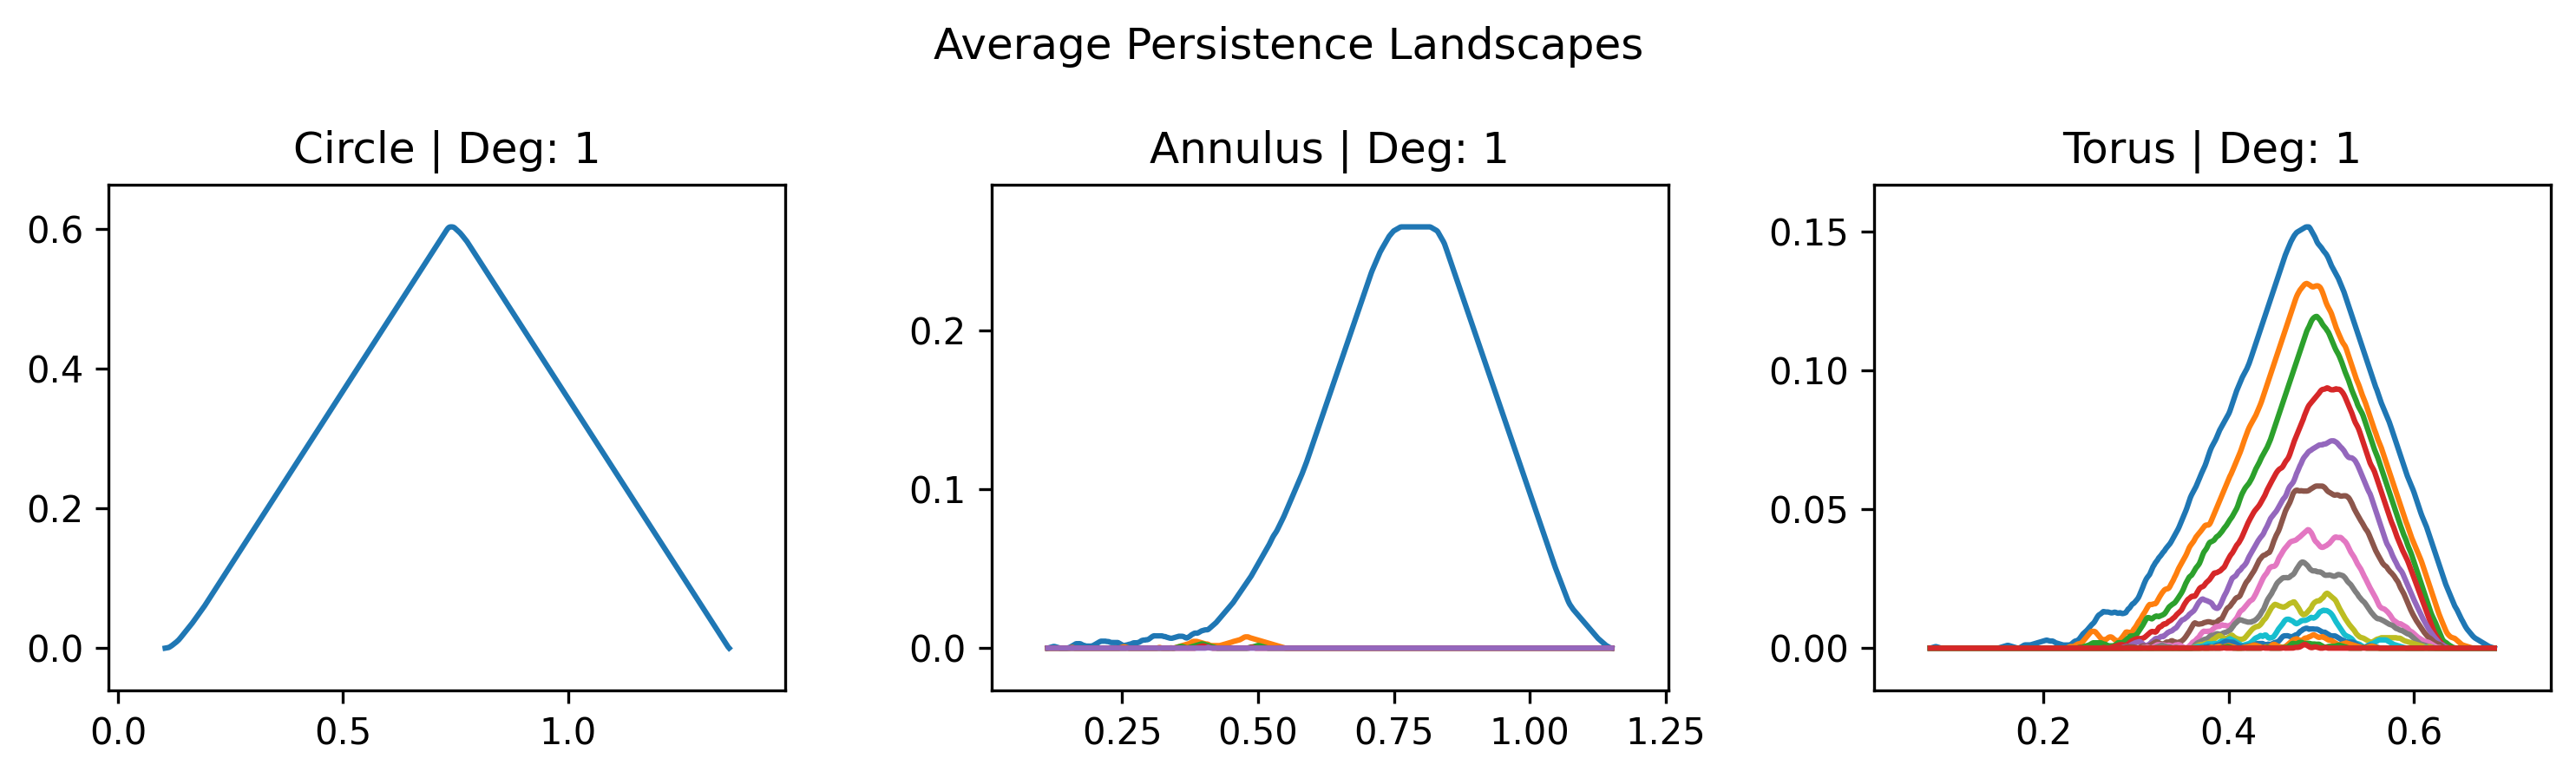

In [25]:
fig, axs = plt.subplots(1, 3, dpi=300)
fig.set_size_inches(10, 3)


plot_landscape_simple(circle_pls_average,
                      title="Circle | Deg: "+str(1),
                      ax=axs[0])
axs[0].legend('', frameon=False)
plot_landscape_simple(annulus_pls_average,
                      title="Annulus | Deg: "+str(1),
                      ax=axs[1])
axs[1].legend('', frameon=False)
plot_landscape_simple(torus_pls_average,
                      title="Torus | Deg: "+str(1),
                      ax=axs[2])
axs[2].legend('', frameon=False)

fig.suptitle("Average Persistence Landscapes")
fig.tight_layout()

In [26]:
[circle_pls_average_snapped, annulus_pls_average_snapped, torus_pls_average_snapped] = snap_pl([circle_pls_average, annulus_pls_average, torus_pls_average])

circle_annulus_diff_pl = circle_pls_average_snapped - annulus_pls_average_snapped
circle_torus_diff_pl = circle_pls_average_snapped - torus_pls_average_snapped
annulus_torus_diff_pl = annulus_pls_average_snapped - torus_pls_average_snapped

circle_annulus_diff_pl, circle_torus_diff_pl, annulus_torus_diff_pl

(Approximate persistence landscape in homological degree 1 on grid from 0.07758022099733353 to 1.3587137460708618 with 500 steps,
 Approximate persistence landscape in homological degree 1 on grid from 0.07758022099733353 to 1.3587137460708618 with 500 steps,
 Approximate persistence landscape in homological degree 1 on grid from 0.07758022099733353 to 1.3587137460708618 with 500 steps)

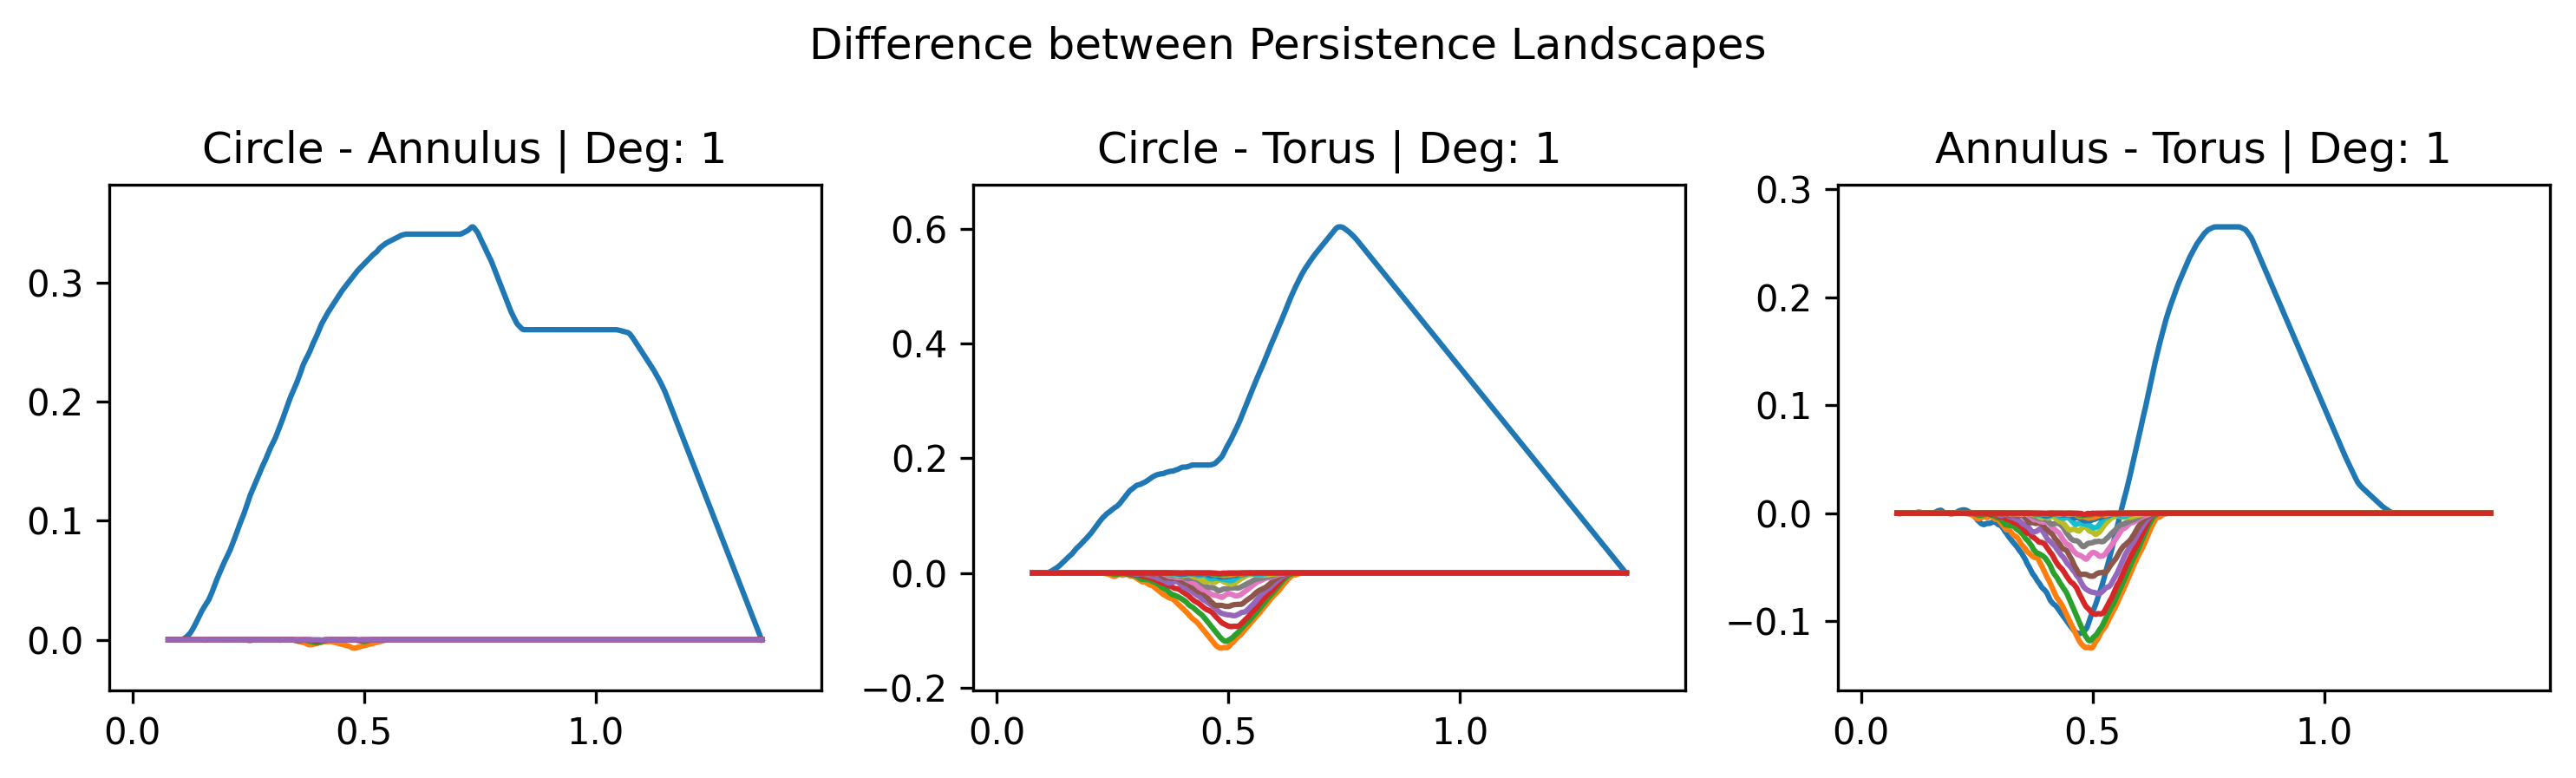

In [27]:
fig, axs = plt.subplots(1, 3, dpi=300)
fig.set_size_inches(10, 3)


plot_landscape_simple(circle_annulus_diff_pl,
                      title="Circle - Annulus | Deg: "+str(1),
                      ax=axs[0])
axs[0].legend('', frameon=False)
plot_landscape_simple(circle_torus_diff_pl,
                      title="Circle - Torus | Deg: "+str(1),
                      ax=axs[1])
axs[1].legend('', frameon=False)
plot_landscape_simple(annulus_torus_diff_pl,
                      title="Annulus - Torus | Deg: "+str(1),
                      ax=axs[2])
axs[2].legend('', frameon=False)

fig.suptitle("Difference between Persistence Landscapes")
fig.tight_layout()

In [28]:
comb_pl = circle_pls + annulus_pls
sig_count = 0
significance = circle_annulus_diff_pl.sup_norm()
NUM_PERMS = 1000

for shuffle in range(NUM_PERMS):
    A_indices = random.sample(range(2*NUM_RUNS), NUM_RUNS)
    B_indices = [_ for _ in range(2*NUM_RUNS) if _ not in A_indices]

    A_pl = [comb_pl[i] for i in A_indices]
    B_pl = [comb_pl[j] for j in B_indices]

    A_avg = average_approx(A_pl)
    B_avg = average_approx(B_pl)
    [A_avg_sn, B_avg_sn] = snap_pl([A_avg,B_avg])

    shuff_diff = A_avg_sn - B_avg_sn
    if (shuff_diff.sup_norm() >= significance): sig_count += 1

pval = sig_count/NUM_PERMS

print(f'There were {sig_count} shuffles out of {NUM_PERMS} that',
     'were more significant than the true labelling. Thus, the',
     f'p-value is {pval}.')

There were 0 shuffles out of 1000 that were more significant than the true labelling. Thus, the p-value is 0.0.


## 7. Statistical tests on two torus points datasets

Noisy torus points vs uniformly sampled torus points.

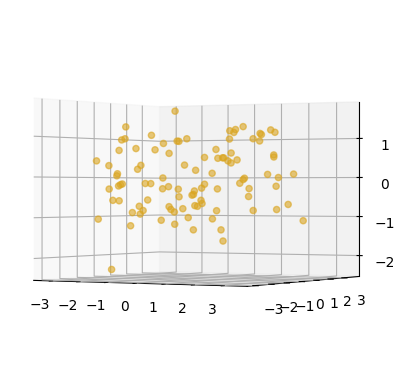

In [29]:
torus1_points = tadasets.torus(100, noise=0.5)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(torus1_points[:, 0], torus1_points[:, 1], torus1_points[:, 2], c="goldenrod", alpha=0.6);

def rotate_torus(angle):
    ax.view_init(elev=angle)

rot_animation_torus = animation.FuncAnimation(fig, rotate_torus, frames=np.arange(0,92,2), interval = 1000)
rot_animation_torus.save('noisy_torus_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In [30]:
# The following code is for encoding and playing video on Google colab.
mp4 = open('noisy_torus_animation.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [31]:
# Torus 1 and Torus 2
torus1_pls = []
torus2_pls = []

NUM_RUNS = 10

TORUS1_AVG_DIST = 2.872
TORUS2_AVG_DISTANCE = 2.872

for _ in range(NUM_RUNS):
  # Scaling torus points
  torus1_points = tadasets.torus(100, noise=0.1) / TORUS1_AVG_DIST
  # Compute PH0, PH1, and PH2 for torus_points
  torus1_dgm = ripser(torus1_points, maxdim=2)['dgms']
  # Compute persistence landscape of torus points for homology degree 1
  torus1_pl = PersLandscapeApprox(dgms=torus1_dgm, hom_deg=1)
  torus1_pls.append(torus1_pl)

  # Scaling torus 2 points
  torus2_points = tadasets.torus(100, noise=None) / TORUS2_AVG_DISTANCE
  # Compute PH0, PH1, and PH2 for torus_points
  torus2_dgm = ripser(torus2_points, maxdim=2)['dgms']
  # Compute persistence landscape of torus points for homology degree 1
  torus2_pl = PersLandscapeApprox(dgms=torus2_dgm, hom_deg=1)
  torus2_pls.append(torus2_pl)

In [32]:
torus1_pls_avg = average_approx(torus1_pls)
torus2_pls_avg = average_approx(torus2_pls)

torus1_pls_avg, torus2_pls_avg

(Approximate persistence landscape in homological degree 1 on grid from 0.16034549474716187 to 0.6865965723991394 with 500 steps,
 Approximate persistence landscape in homological degree 1 on grid from 0.1417727917432785 to 0.6912244558334351 with 500 steps)

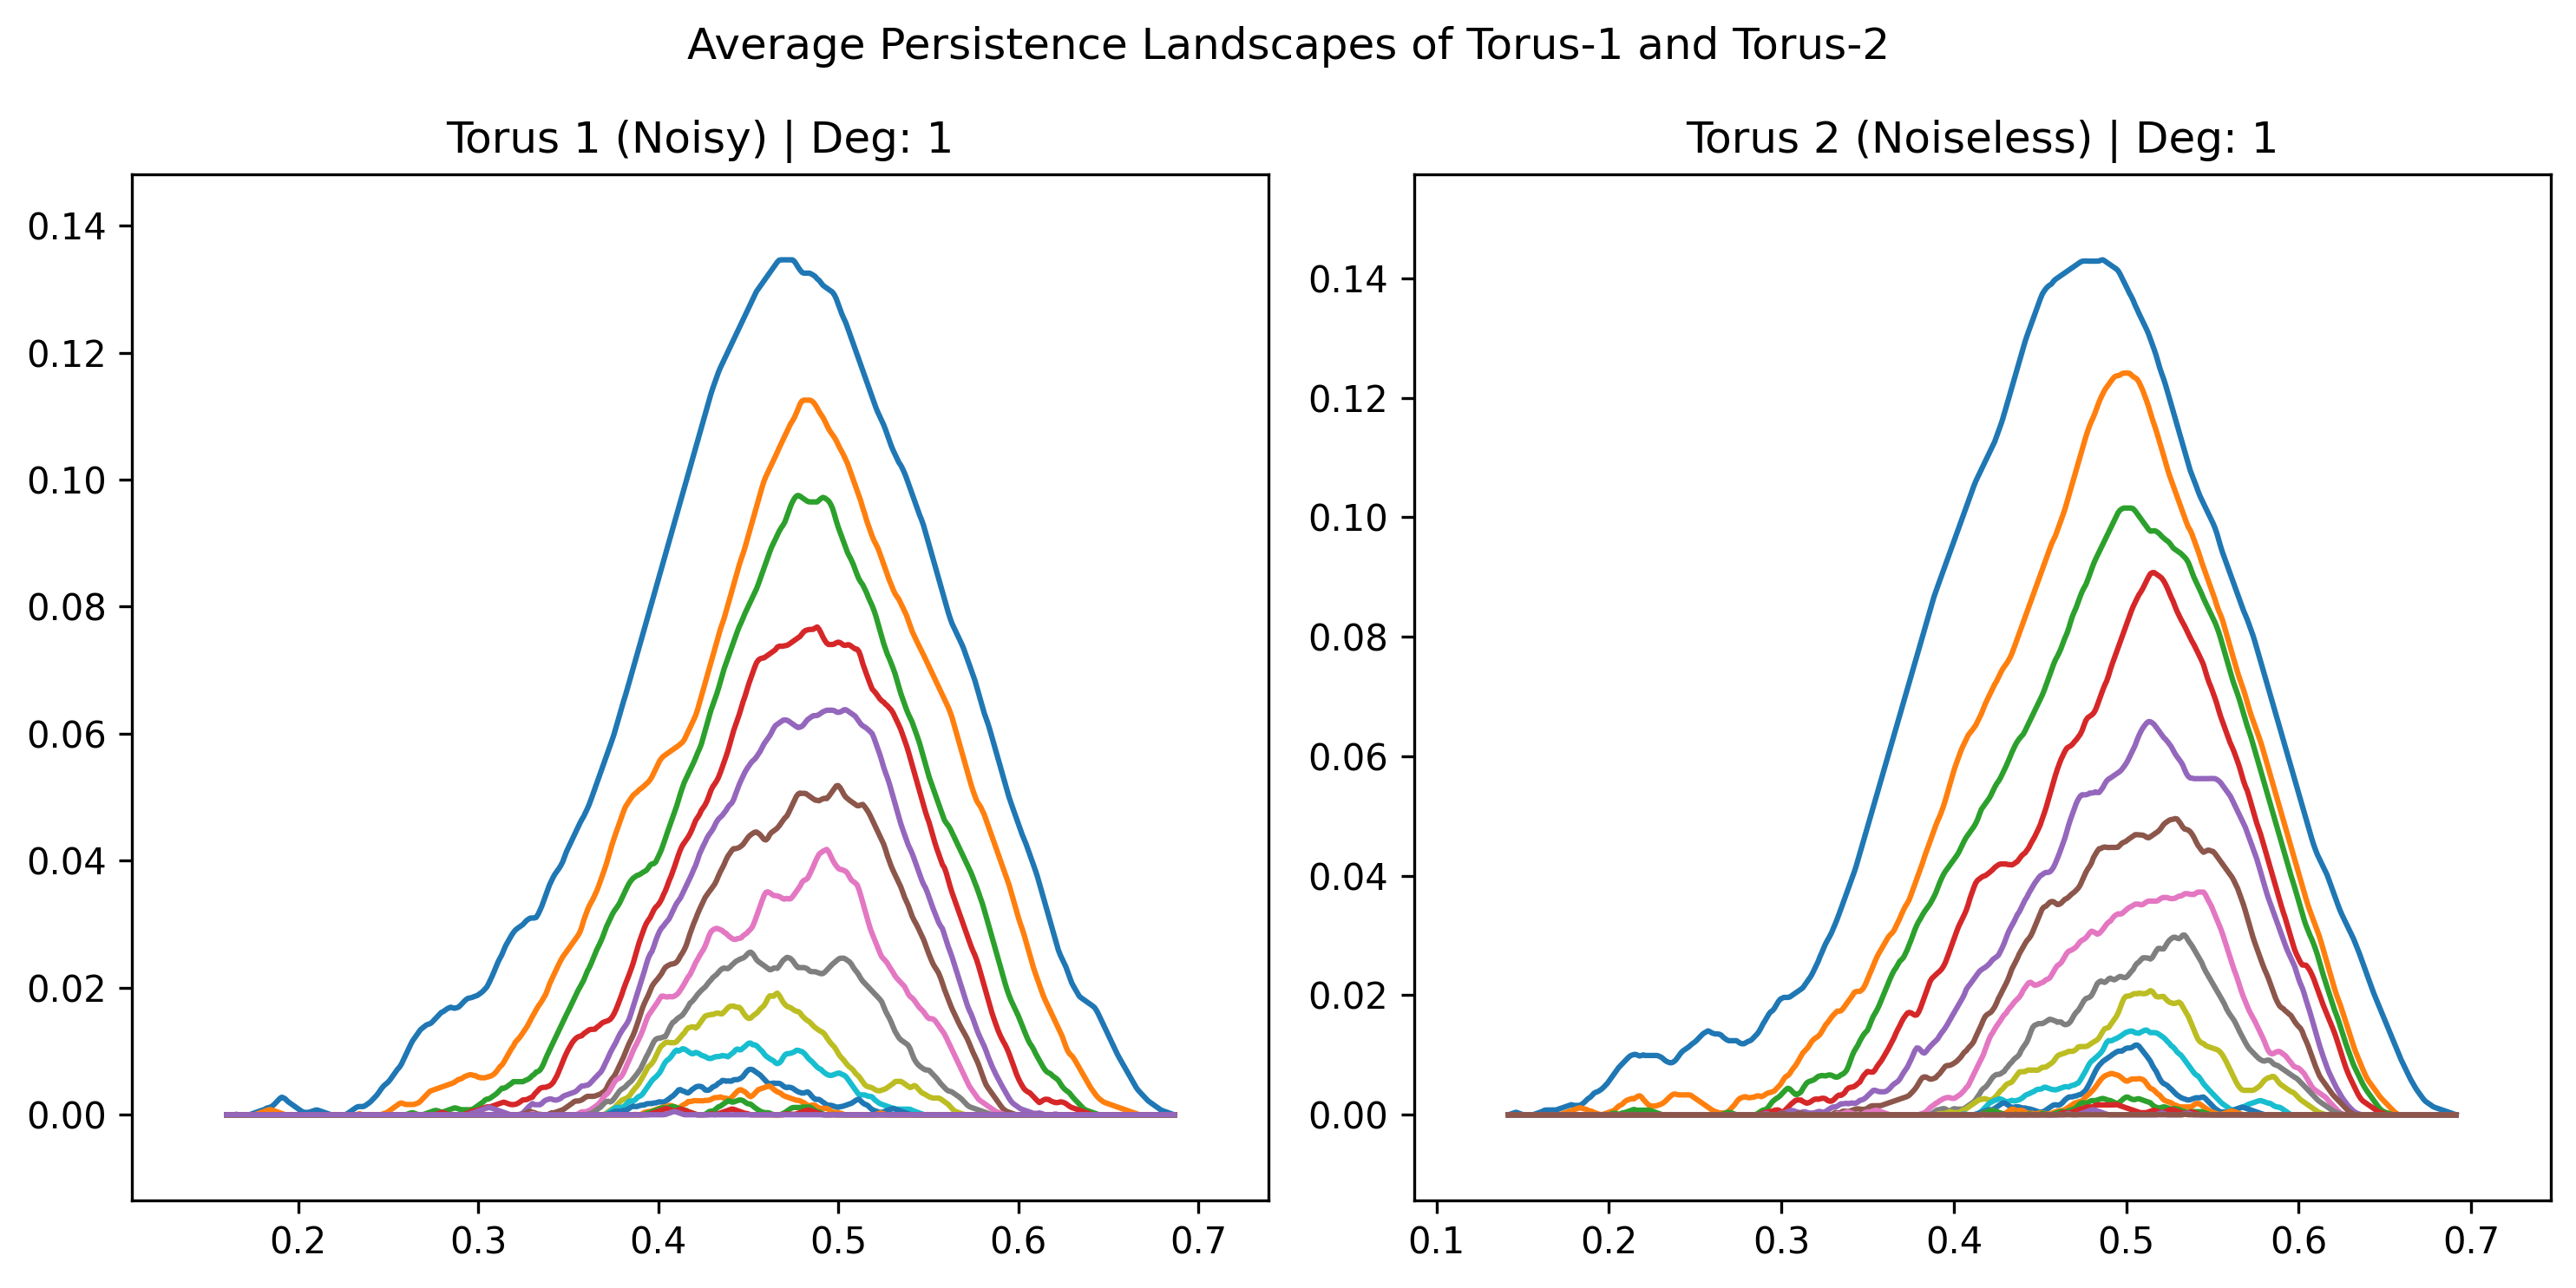

In [33]:
fig, axs = plt.subplots(1, 2, dpi=300)
fig.set_size_inches(10, 5)

plot_landscape_simple(torus1_pls_avg,
                      title="Torus 1 (Noisy) | Deg: 1",
                      ax=axs[0])
axs[0].legend('', frameon=False)
plot_landscape_simple(torus2_pls_avg,
                      title="Torus 2 (Noiseless) | Deg: 1",
                      ax=axs[1])
axs[1].legend('', frameon=False)

fig.suptitle("Average Persistence Landscapes of Torus-1 and Torus-2")
fig.tight_layout()

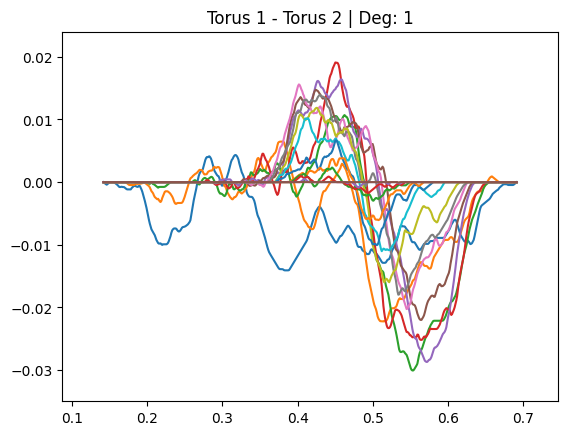

In [34]:
torus1_pls_avg_snapped, torus2_pls_avg_snapped = snap_pl([torus1_pls_avg, torus2_pls_avg])
torus1_torus2_diff_pl = torus1_pls_avg_snapped - torus2_pls_avg_snapped

plot_landscape_simple(torus1_torus2_diff_pl,
                      title="Torus 1 - Torus 2 | Deg: 1")
plt.legend('', frameon=False)

In [35]:
torus1_torus2_diff_pl.sup_norm()

0.030046359645221433

In [36]:
comb_pl = torus1_pls + torus2_pls
sig_count = 0
significance = torus1_torus2_diff_pl.sup_norm()
NUM_PERMS = 1000

for shuffle in range(NUM_PERMS):
    A_indices = random.sample(range(2*NUM_RUNS), NUM_RUNS)
    B_indices = [_ for _ in range(2*NUM_RUNS) if _ not in A_indices]

    A_pl = [comb_pl[i] for i in A_indices]
    B_pl = [comb_pl[j] for j in B_indices]

    A_avg = average_approx(A_pl)
    B_avg = average_approx(B_pl)
    [A_avg_sn, B_avg_sn] = snap_pl([A_avg,B_avg])

    shuff_diff = A_avg_sn - B_avg_sn
    if (shuff_diff.sup_norm() >= significance): sig_count += 1

pval = sig_count/NUM_PERMS

print(f'There were {sig_count} shuffles out of {NUM_PERMS} that',
     'were more significant than the true labelling. Thus, the',
     f'p-value is {pval}.')

There were 67 shuffles out of 1000 that were more significant than the true labelling. Thus, the p-value is 0.067.


In [37]:
# Perform the Kolmogorov-Smirnov test on the average persistence landscapes.

ks_stat, ks_pval = ks_2samp(torus1_pls_avg.values.flatten(), torus2_pls_avg.values.flatten())

print(f"KS statistic: {ks_stat}")
print(f"KS p-value: {ks_pval}")

KS statistic: 0.017708333333333333
KS p-value: 0.1737329899531142
